# Data Preprocessing Project – Feature Scaling



## Table of Contents


1.	Introduction

2.	Normalizing data with MinMaxScaler

3.	Standardising data with StandardScaler

4.  Rescaling data with RobustScaler


## 1. Introduction

<img src="https://miro.medium.com/max/1250/1*yR54MSI1jjnf2QeGtt57PA.png">

One of the most important data preprocessing step, we need to apply to our data is feature scaling. When we encounter any real world data set, the independent or feature variables may be mapped onto different scales.

This could cause some problems like feature with a higher value range make the model biased to this feature and it starts dominating .

we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

**Feature scaling** refers to procedures used to standardize these independent or feature variables so that they are mapped onto same scales.


Most of the ML algorithms perform well when the feature variables are mapped onto the same scale. They don’t perform well when features are mapped onto different scales. For example, in stochastic gradient descent, feature scaling can improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors. 


But, there are few exceptions as well. Decision trees and random forests are two of the algorithms where we don’t need to worry about feature scaling. These algorithms are scale invariant. Similarly, Naive Bayes and Linear Discriminant Analysis are not affected by feature scaling. In Short, any Algorithm which is not distance based is not affected by feature scaling.

So, let’s start our discussion of various techniques associated with feature scaling.

<hr>

### There are 3 methods

1. Normalization with `MinMaxScaler`
2. Standardization with `StandardScaler`
3. `Robust Scaler`

**Advantages**<br>

- Normalization: shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
- Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.
- Robust Scaler: similar to Standardization but it instead uses the interquartile range, so that it is robust to outliers.


**Disadvantages**<br>

- Normalization: get influenced heavily by outliers (i.e. extreme values).
- Standardization: not good if the data is not normally distributed (i.e. no Gaussian Distribution).
- Robust Scaler: doesn't take the median into account and only focuses on the parts where the bulk data is.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
# ignore the warnings

import warnings
warnings.filterwarnings("ignore")

## 2. Normalizing data with MinMaxScaler


This technique of rescaling is also called **min-max scaling** or **min-max normalization**. **Normalization** refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. So, in this technique, values are shifted and rescaled so that they end up ranging from zero to one. We do this by subtracting the minimum value (xmin ) and dividing by the maximum value (xmax ) minus the minimum value (xmin ). 


Mathematically, the new value x(i)norm of a sample x(i) can be calculated as follows:-

 
		     x(i)norm  =  (xi-  xmin )/(xmax-  xmin )
             
	
Here, x(i) is a particular sample value. xmax and xmin is the maximum and minimum feature value in a column.

	
Scikit-Learn provides a transformer called **MinMaxScaler** for this task. It has a feature range parameter to adjust the range of values. This estimator fit and transform each feature variable individually such that it is in the given range (between zero and one) on the training set. 

**MinMaxScaler** works well for the cases when the distribution is not normal or when the standard deviation is very small. But, it has one drawback. It is sensitive to outliers


The syntax for implementing min-max scaling procedure in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import MinMaxScaler`

`ms = MinMaxScaler()`

`X_train_ms = ms.fit_transform(X_train)`

`X_test_ms = ms.transform(X_test)`


In [3]:
# Create sample dataset to demonstrate minmaxscaling


df1 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [4]:
df1

,x1,x2,x3
0,8.018837,28.380648,51.680710
1,5.552522,35.291277,50.591686
2,8.599914,35.482577,51.069094
3,14.321710,36.206688,48.075122
4,12.515635,36.252637,49.265998
...,...,...,...
995,12.793618,29.559919,37.563613
996,10.369371,33.178894,44.019707
997,5.939713,30.791611,48.520211
998,11.027731,38.570224,53.505327


In [5]:
df1.describe()

,x1,x2,x3
count,1000.000000,1000.000000,1000.000000
mean,9.870472,33.508257,49.934747
std,4.303696,3.977461,2.954474
min,1.323713,12.750642,37.563613
25%,6.658538,31.383468,48.206668
50%,9.235122,34.211721,50.013858
75%,12.493389,36.481261,51.907219
max,24.829389,39.764989,59.530510


In [6]:
# Use MinMaxScaler to apply minmaxscaling

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
scaled_df1 = ms.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['x1', 'x2', 'x3'])

In [7]:
scaled_df1

,x1,x2,x3
0,0.284830,0.578582,0.642653
1,0.179906,0.834395,0.593078
2,0.309551,0.841476,0.614811
3,0.552973,0.868281,0.478516
4,0.476137,0.869982,0.532728
...,...,...,...
995,0.487963,0.622235,0.000000
996,0.384829,0.756200,0.293901
997,0.196378,0.667829,0.498778
998,0.412837,0.955773,0.725715


In [8]:
df1

,x1,x2,x3
0,8.018837,28.380648,51.680710
1,5.552522,35.291277,50.591686
2,8.599914,35.482577,51.069094
3,14.321710,36.206688,48.075122
4,12.515635,36.252637,49.265998
...,...,...,...
995,12.793618,29.559919,37.563613
996,10.369371,33.178894,44.019707
997,5.939713,30.791611,48.520211
998,11.027731,38.570224,53.505327


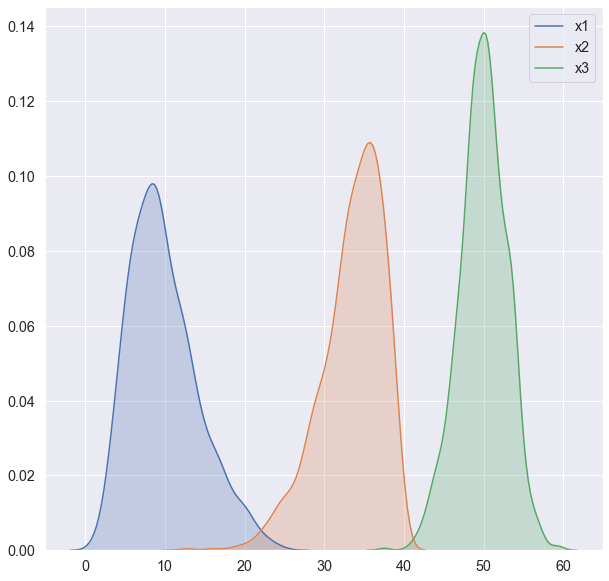

In [9]:
sns.kdeplot(df1['x1'], shade=True)
sns.kdeplot(df1['x2'], shade=True)
sns.kdeplot(df1['x3'], shade=True)

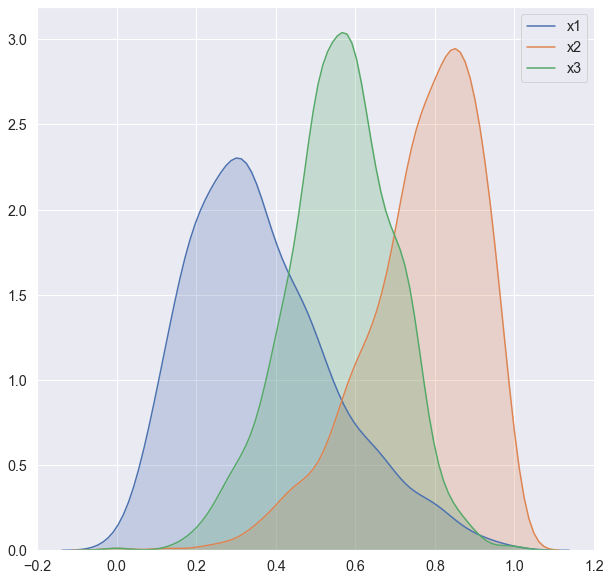

In [10]:
sns.kdeplot(scaled_df1['x1'], shade=True)
sns.kdeplot(scaled_df1['x2'], shade=True)
sns.kdeplot(scaled_df1['x3'], shade=True)

**Interpretation**

We can see that the skewness of the distributions are maintained. But, now the three distributions are brought onto the same scale such that they overlap.

As with all the other transformers, we fit this transformer to the training data only, not to the full data set (including the test set). Only then we can use them to transform the training set and the test set and new data.

## 3. Standardising data with StandardScaler


There is another practical approach for feature scaling which might be more useful in certain circumstances. It is called **standardization**. It can be more useful for many machine learning algorithms, especially for optimization algorithms such as gradient descent.


In **standardization**, first we determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation. So, in standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights.


Scikit-Learn provides a transformer called **StandardScaler** for standardization. The **StandardScaler** transformer assumes that the data is normally distributed within each feature and it will scale them such that the distribution is centered around 0 and and have a standard deviation of 1.


Mathematically, **standardization** can be expressed by the following equation: 


		x(i)std =  ( x(i)- μx)/(σx )


Here, x(i) is a particular sample value and x(i)std is its standard deviation , μx is the sample mean of a particular feature column and σx is the corresponding standard deviation.


Min-max scaling scales the data to a limited range of values. Unlike min-max scaling, standardization does not bound values to a specific range. So, standardization is much less affected by outliers. Standardization maintains useful information about outliers and is much less affected by them. It makes the algorithm less sensitive to outliers in contrast to min-max scaling. 


The syntax to implement standardization is quite similar to min-max scaling given as follows :-


`from sklearn.preprocessing import StandardScaler`

`ss = StandardScaler()`

`X_train_ss = ss.fit_transform(X_train)`

`X_test_ss = ss.transform(X_test)`


In [11]:
# Create sample dataset to demonstrate standardization

np.random.seed(1)
df2 = pd.DataFrame({
            'x1':np.random.normal(0, 10, 10000),
            'x2':np.random.normal(10, 20, 10000),
            'x3':np.random.normal(-10, 10, 10000)
})

In [12]:
df2

,x1,x2,x3
0,16.243454,7.550522,-29.315639
1,-6.117564,14.563396,-11.604261
2,-5.281718,2.953897,-18.322195
3,-10.729686,-6.611069,-12.061116
4,8.654076,4.778204,0.262549
...,...,...,...
9995,0.729586,-8.864168,-3.101756
9996,4.891022,25.644315,-4.471805
9997,-10.141438,58.168676,-10.838381
9998,-0.626962,27.655711,-22.835345


In [13]:
df2.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.097727,10.188708,-10.146035
std,9.988358,20.024787,9.959989
min,-36.564401,-59.028058,-52.331648
25%,-6.629248,-3.445888,-16.865381
50%,0.084541,10.376055,-10.174539
75%,6.718088,23.773668,-3.570600
max,40.268490,93.362354,26.597658


In [14]:
# Use StandardScaler to apply Standardisation

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df2 = ss.fit_transform(df2)
scaled_df2 = pd.DataFrame(scaled_df2, columns = ['x1', 'x2', 'x3'])

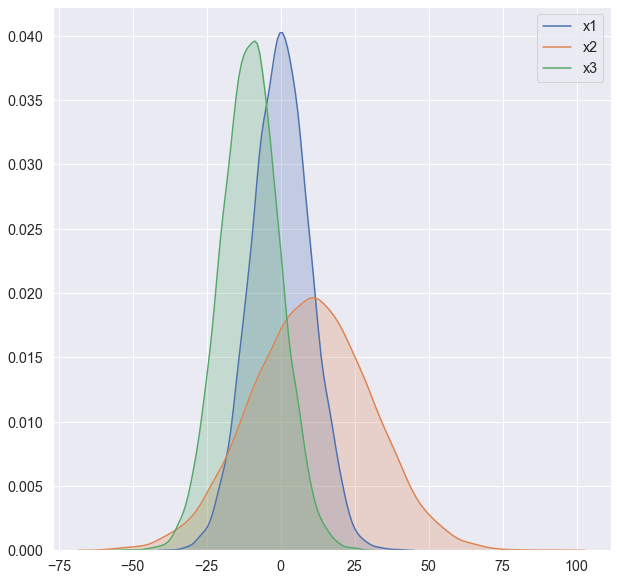

In [15]:
sns.kdeplot(df2['x1'], shade=True)
sns.kdeplot(df2['x2'], shade=True)
sns.kdeplot(df2['x3'], shade=True)

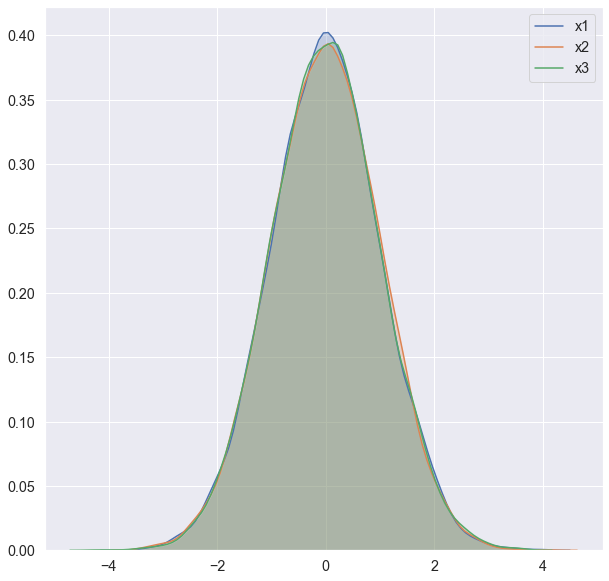

In [16]:
sns.kdeplot(scaled_df2['x1'], shade=True)
sns.kdeplot(scaled_df2['x2'], shade=True)
sns.kdeplot(scaled_df2['x3'], shade=True)

**Interpretation**

As we can see, all the features are now on the same scale relative to one another. 

We should fit the **StandardScaler** class only once on the training data set and use those parameters to transform the test set or new data set. 

So, we can **standardize** the training dataset and use the same mean and standard deviation to **standardize** the test dataset.


## 4. Rescaling using RobustScaler



**StandardScaler** can often give misleading results when the data contain outliers.  Outliers can often influence the sample mean and variance and hence give misleading results. In such cases, it is better to use a scalar that is robust against outliers. Scikit-Learn provides a transformer called **RobustScaler** for this purpose.


The **RobustScaler** is very similar to **MinMaxScaler**. The difference lies in the parameters used for scaling. 
While **MinMaxScaler** uses minimum and maximum values for rescaling, **RobustScaler** uses interquartile(IQR) range 
for the same.



Mathematically, the new value x(i)norm of a sample x(i) can be calculated as follows:-

 
		     x(i)  =  (xi-  Q1(x) )/(Q3(x) - Q1(x))
             
	
Here, x(i) is the scaled value, xi is a particular sample value, Q1(x) and Q3(x) are the 1st quartile (25th quantile) and 
3rd quartile (75th quantile) respectively. So, Q3(x) - Q1(x) is the difference between 3rd quartile (75th quantile) and 
1st quartile (25th quantile) respectively. It is called IQR (Interquartile Range).

	

The syntax for implementing scaling using RobustScaler in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import RobustScaler`

`rb = RobustScaler()`

`X_train_rb = rb.fit_transform(X_train)`

`X_test_rb = rb.transform(X_test)`


In [17]:
# Create sample dataset to demonstrate scaling using RobustScaler

df4 = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [18]:
df4

,x1,x2
0,20.386055,31.659525
1,19.500848,29.817193
2,21.286488,31.178553
3,19.647787,29.430769
4,22.242901,31.841982
...,...,...
1020,0.006776,51.954951
1021,0.359849,49.042662
1022,0.712099,49.425386
1023,2.608307,49.945519


In [19]:
df4.describe()

,x1,x2
count,1025.000000,1025.000000
mean,19.567343,30.523839
std,3.100753,3.246007
min,-0.736564,26.967400
25%,19.270767,29.388065
50%,20.009050,30.051780
75%,20.707325,30.768986
max,23.622574,51.954951


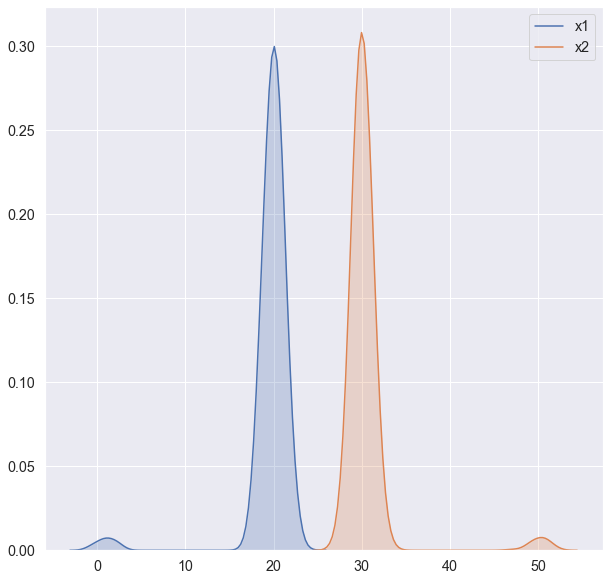

In [20]:
sns.kdeplot(df4['x1'], shade=True)
sns.kdeplot(df4['x2'], shade=True)

In [21]:
# Use RobustScaler for scaling

from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
robust_scaled_df4 = rb.fit_transform(df4)
robust_scaled_df4 = pd.DataFrame(robust_scaled_df4, columns=['x1', 'x2'])

# Use MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
minmax_scaled_df4 = ms.fit_transform(df4)
minmax_scaled_df4 = pd.DataFrame(minmax_scaled_df4, columns=['x1', 'x2'])

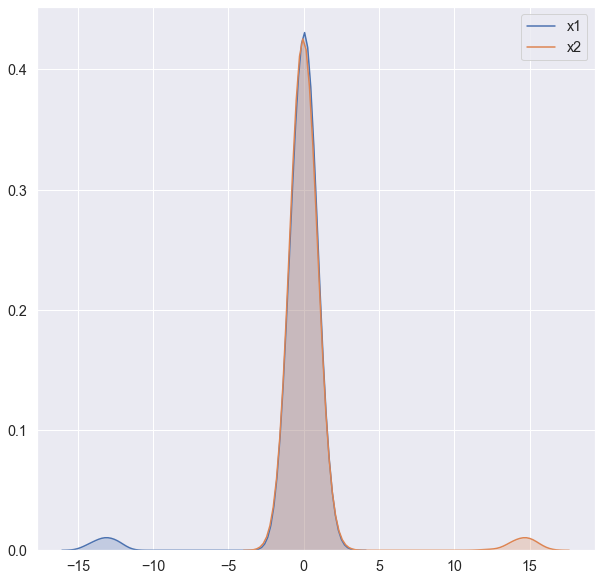

In [22]:
sns.kdeplot(robust_scaled_df4['x1'], shade=True)
sns.kdeplot(robust_scaled_df4['x2'], shade=True)

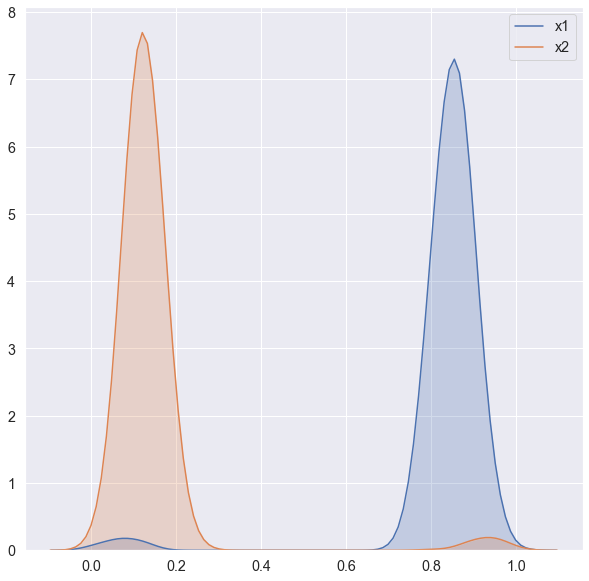

In [23]:
sns.kdeplot(minmax_scaled_df4['x1'], shade=True)
sns.kdeplot(minmax_scaled_df4['x2'], shade=True)

**Interpretation**

We can see that, **RobustScaler** transform the distributions to brought them onto the same scale.The distributions actually overlap each other. The outliers remain outside the range of the new distributions. 

In **MinMaxScaler**, the two normal distributions are kept separate by the outliers that are inside the range of 0 and 1.

## Real world data example

In [24]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [25]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


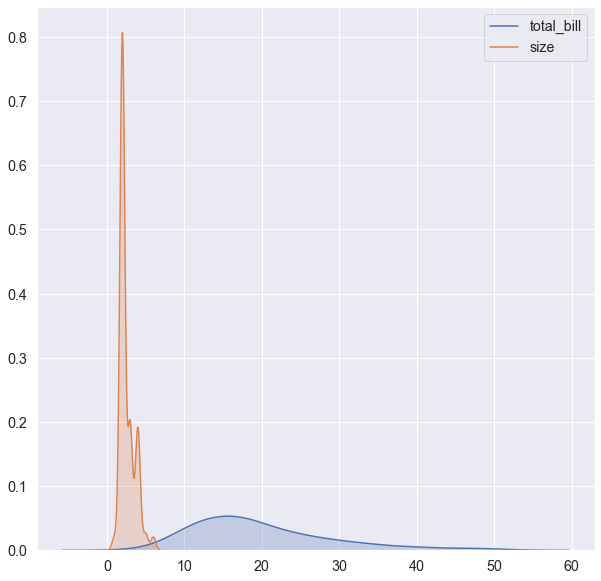

In [26]:
sns.kdeplot(df['total_bill'], shade=True)
sns.kdeplot(df['size'], shade=True)

In [27]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [28]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [29]:
x = df.drop('tip', axis=1)
y = df['tip']

In [30]:
x

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [31]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape

(195, 8)

In [34]:
x_test.shape

(49, 8)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



#########################################
# if you want to scale custom columns use this
#########################################

# columns = ['total_bill', 'size']

# scaler.fit(x_train[columns])

# x_train[columns] = scaler.transform(x_train[columns])
# x_test[columns] = scaler.transform(x_test[columns])

In [37]:
x_train

array([[-0.88467338, -0.57222776,  1.27872403, ..., -0.77353775,
        -0.61885275, -1.53690239],
       [-0.66637158, -0.57222776, -0.78202957, ...,  1.29276172,
        -0.61885275,  0.65065941],
       [-0.48970466, -0.57222776,  1.27872403, ..., -0.77353775,
        -0.61885275,  0.65065941],
       ...,
       [ 1.17118944,  1.47519265,  1.27872403, ...,  1.29276172,
        -0.61885275,  0.65065941],
       [ 0.00991389, -0.57222776, -0.78202957, ...,  1.29276172,
        -0.61885275,  0.65065941],
       [-0.27252813, -0.57222776,  1.27872403, ..., -0.77353775,
         1.61589329,  0.65065941]])

In [38]:
x_test

array([[-1.11985418, -0.57222776, -0.78202957,  0.79056942, -0.28867513,
        -0.77353775, -0.61885275, -1.53690239],
       [-0.25452385, -0.57222776,  1.27872403,  0.79056942, -0.28867513,
        -0.77353775, -0.61885275, -1.53690239],
       [ 1.69668913,  1.47519265,  1.27872403,  0.79056942, -0.28867513,
        -0.77353775,  1.61589329,  0.65065941],
       [ 0.69295096,  1.47519265, -0.78202957, -1.26491106, -0.28867513,
         1.29276172, -0.61885275,  0.65065941],
       [-0.9555652 , -0.57222776, -0.78202957, -1.26491106, -0.28867513,
         1.29276172, -0.61885275,  0.65065941],
       [-0.07335587, -0.57222776, -0.78202957,  0.79056942, -0.28867513,
        -0.77353775, -0.61885275, -1.53690239],
       [-0.25002279, -0.57222776,  1.27872403, -1.26491106, -0.28867513,
        -0.77353775,  1.61589329,  0.65065941],
       [-0.98032107, -0.57222776, -0.78202957, -1.26491106, -0.28867513,
         1.29276172, -0.61885275,  0.65065941],
       [ 1.67643432, -0.57222776

# Great Work!